In [43]:
import pandas as pd
import numpy as np
import os

RANDOM_STATE = 404

In [44]:
df = pd.read_csv('data/HAD.csv')
df.head()

,AGE,AGE_MISSING,SEX_F,NIHSS_BL,NIHSS_BL_MISSING,SYS_BLOOD_PRESSURE,SYS_BLOOD_PRESSURE_MISSING,PREV_MRS,PREV_MRS_MISSING,ORAL_ANTICOAGULANT,...,ONSET_TO_ADMISSION,ONSET_TO_ADMISSION_MISSING,ONSET_TO_IMAGING,ONSET_TO_IMAGING_MISSING,ONSET_TO_TPA,ONSET_TO_TPA_MISSING,ONSET_TO_GROIN,ONSET_TO_GROIN_MISSING,MRS_90,MRS_90_DICHO
0,70,0,0,3,0,-1,1,0,0,0,...,64,0,96,0,180,0,-1,1,0,0
1,55,0,0,6,0,142,0,3,0,0,...,38,0,104,0,165,0,-1,1,4,1
2,73,0,0,3,0,170,0,0,0,1,...,-1,1,-1,1,-1,1,-1,1,2,0
3,81,0,0,10,0,-1,1,0,0,0,...,69,0,90,0,115,0,-1,1,3,1
4,81,0,1,11,0,-1,1,0,0,0,...,98,0,110,0,120,0,-1,1,0,0


In [45]:
target_feature = 'MRS_90'
y = df.filter([target_feature])
y.to_csv('data/HAD_target.csv', index=False)

#### Because of the warning given while imputing missing values, 'SERUM_GLUCOSE' and 'VALV_HEART' columns are removed due to not having any other entry than '-1' value

In [46]:
columns_to_add_back = ['SERUM_GLUCOSE', 'SERUM_GLUCOSE_MISSING', 'VALV_HEART']
columns_to_add_back_df = df[columns_to_add_back].copy()
df = df.drop(columns=['SERUM_GLUCOSE', 'SERUM_GLUCOSE_MISSING', 'VALV_HEART', 'MRS_90', 'MRS_90_DICHO'], axis=1)

### Data standardization

In [47]:
from sklearn.preprocessing import StandardScaler

# Replace all -1 values with NaN to avoid normalization on missing values
df.replace(-1, np.nan, inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
columns_to_scale = [col for col in df.columns if '_MISSING' not in col]

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Convert the scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Retrieve the unscaled columns
unscaled_columns = [col for col in df.columns if col not in columns_to_scale]

# Concatenate scaled and unscaled columns
df = pd.concat([df_scaled, df[unscaled_columns]], axis=1)

df

,AGE,SEX_F,NIHSS_BL,SYS_BLOOD_PRESSURE,PREV_MRS,ORAL_ANTICOAGULANT,HYPERTENSION,HYPERCHOL,ISCH_HEART,SMOKING,...,AGE_MISSING,NIHSS_BL_MISSING,SYS_BLOOD_PRESSURE_MISSING,PREV_MRS_MISSING,ASPECTS_MISSING,CTA_CS_MISSING,ONSET_TO_ADMISSION_MISSING,ONSET_TO_IMAGING_MISSING,ONSET_TO_TPA_MISSING,ONSET_TO_GROIN_MISSING
0,0.000972,-0.908801,-0.870588,NaN,-0.641768,-0.370094,0.674720,0.991543,-0.660934,1.867007,...,0,0,1,0,0,1,0,0,0,1
1,-1.053091,-0.908801,-0.513781,-0.323477,1.622132,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,1,0,0,0,1
2,0.211784,-0.908801,-0.870588,0.767434,-0.641768,2.702015,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,1,1,1,1,1,1
3,0.773951,-0.908801,-0.038039,NaN,-0.641768,-0.370094,0.674720,-1.008529,1.513010,-0.535617,...,0,0,1,0,1,1,0,0,0,1
4,0.773951,1.100351,0.080897,NaN,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.071243,-0.908801,-0.870588,NaN,-0.641768,-0.370094,-1.482097,-1.008529,-0.660934,-0.535617,...,0,0,1,0,0,1,0,0,0,1
940,-0.490924,-0.908801,-0.870588,-0.323477,1.622132,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,0,0,0,0,1,1,0,0,1
941,-0.631466,1.100351,-1.227395,-1.804000,-0.641768,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,0,0,0,1,1,1,1,1,1
942,0.703680,1.100351,0.199833,NaN,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,1,0,0,0,0,0,1,0


## Generating missing data based on sklearn imputers

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer_df = df.copy()  # Creating a copy of the original DataFrame for imputation

# Initialize IterativeImputer with median strategy for missing values
imp = IterativeImputer(missing_values=np.NaN, initial_strategy='median', random_state=RANDOM_STATE)

# Iterate through columns in the DataFrame
for col in imputer_df.columns:
    # Skip columns ending with '_MISSING'
    if col.endswith('_MISSING'):
        continue
    # Check if there is a corresponding missing flag column
    elif col + "_MISSING" in df.columns:
        # Check if there are missing values to impute
        if (imputer_df[col + "_MISSING"] == 1).any() and (pd.isna(imputer_df[col])).any():
            # Fit imputer on the column and transform the values
            imp.fit(imputer_df[[col]])
            imputer_df[col] = imp.transform(imputer_df[[col]]).ravel()
            imputer_df[col + '_MISSING'] = 0
    else:
        # Check if there are missing values to impute
        if (pd.isna(imputer_df[col])).any():
            # Fit imputer on the column and transform the values
            imp.fit(imputer_df[[col]])
            imputer_df[col] = imp.transform(imputer_df[[col]]).ravel()

# # Remove columns related to missingness flags
# imputer_df = imputer_df[imputer_df.columns.drop(list(imputer_df.filter(regex='MISSING')))]

imputer_df = pd.concat([imputer_df, columns_to_add_back_df], axis=1)

# Save the imputed DataFrame to a CSV file
imputer_df.to_csv('data/HAD_after_imputer.csv', index=False)

imputer_df

,AGE,SEX_F,NIHSS_BL,SYS_BLOOD_PRESSURE,PREV_MRS,ORAL_ANTICOAGULANT,HYPERTENSION,HYPERCHOL,ISCH_HEART,SMOKING,...,PREV_MRS_MISSING,ASPECTS_MISSING,CTA_CS_MISSING,ONSET_TO_ADMISSION_MISSING,ONSET_TO_IMAGING_MISSING,ONSET_TO_TPA_MISSING,ONSET_TO_GROIN_MISSING,SERUM_GLUCOSE,SERUM_GLUCOSE_MISSING,VALV_HEART
0,0.000972,-0.908801,-0.870588,-0.401399,-0.641768,-0.370094,0.674720,0.991543,-0.660934,1.867007,...,0,0,0,0,0,0,0,-1,1,-1
1,-1.053091,-0.908801,-0.513781,-0.323477,1.622132,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
2,0.211784,-0.908801,-0.870588,0.767434,-0.641768,2.702015,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
3,0.773951,-0.908801,-0.038039,-0.401399,-0.641768,-0.370094,0.674720,-1.008529,1.513010,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
4,0.773951,1.100351,0.080897,-0.401399,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.071243,-0.908801,-0.870588,-0.401399,-0.641768,-0.370094,-1.482097,-1.008529,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
940,-0.490924,-0.908801,-0.870588,-0.323477,1.622132,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
941,-0.631466,1.100351,-1.227395,-1.804000,-0.641768,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1
942,0.703680,1.100351,0.199833,-0.401399,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,0,0,-1,1,-1


### Using BIC to get the optimal number of components for GMM

In [7]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def compute_bic(X, n_components_range):
    """
    Computes the Bayesian Information Criterion (BIC) for Gaussian Mixture Models with different numbers of components.
    
    Parameters:
        X (array-like): Input data.
        n_components_range (range): Range of number of components to evaluate.
        
    Returns:
        list: BIC values for each number of components.
    """
    bic = []  # List to store BIC values
    for n_components in n_components_range:
        # Create Gaussian Mixture Model with specified number of components
        gmm = GaussianMixture(n_components=n_components, random_state=RANDOM_STATE)
        gmm.fit(X)
        bic.append(gmm.bic(X))  # Calculate BIC and add to list
    return bic  # Return list of BIC values

optimal_n_components = 9

if optimal_n_components is None:
    n_components_range = range(1, 51)  # Range of number of components to evaluate
    bic_values = compute_bic(X, n_components_range)  # Compute BIC values
    optimal_n_components = n_components_range[np.argmin(bic_values)]  # Determine optimal number of components

    # Plotting BIC values
    plt.plot(n_components_range, bic_values, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC Value')
    plt.title('BIC for Gaussian Mixture Models')
    plt.grid(True)
    plt.show()


### Gaussian Mixture Model fitting

In [8]:
# Create Gaussian Mixture Model with optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=RANDOM_STATE)

# Fit the Gaussian Mixture Model to the imputed DataFrame
gmm.fit(imputer_df)

GaussianMixture(n_components=9, random_state=404)

### Can set all the values of a specific feature to -1 for the purpose of displaying it's distribution on the heatmap below

In [9]:
# Saving the values of a feature to mark them in the heatmap, e.g. CTA_CS
heatmap_feature = 'SYS_BLOOD_PRESSURE'
heatmap_feature_original_values = pd.Series(df[heatmap_feature].copy().values, index=df.index)

# Get maximum and minimum values from the column
heatmap_feature_max_value = df[heatmap_feature].max()
heatmap_feature_min_value = df[heatmap_feature].min()

df[heatmap_feature] = np.NaN
# Check if the column exists
if heatmap_feature + '_MISSING' in df.columns:
    df[heatmap_feature + '_MISSING'] = 1

### Generating samples of missing values using conditional GMM

In [10]:
from ConditionalGMM.condGMM import CondGMM
import json

def gmm_generate_samples(n_datapoints=2, n_samples=1000, plot_histograms=False, print_index=False):
    """
    Generate samples using Conditional Gaussian Mixture Model for imputing missing data.

    Args:
        n_datapoints (int/str): Number of data points to consider
        n_samples (int): Number of samples to generate
        plot_histograms (bool): Whether to plot histograms of sampled data
        print_index (bool): Whether to print the index of the current data point
    Returns:
        pd.DataFrame: DataFrame with imputed missing data
    """
    if n_datapoints > df.shape[0]:
        n_datapoints = df.shape[0]

    # Create a copy of the DataFrame for data manipulation
    temp_df = df.head(n_datapoints).copy().astype(object)
    # Remove missing flag columns
    temp_df = temp_df[temp_df.columns.drop(list(temp_df.filter(regex='MISSING')))]
        
    for index, row in df.head(n_datapoints).iterrows():
        # Get indices and values of unknown and known features
        unknown_features_indexes, known_features_indexes, known_features_values = get_feature_indices_and_values(temp_df, index, row)
        
        # If all features are known, continue
        if len(unknown_features_indexes) == 0:
            continue
        
        # Initialize CondGMM
        cGMM = CondGMM(gmm.weights_, gmm.means_, gmm.covariances_, known_features_indexes)
        
        # Generate samples using Conditional GMM
        sampled_data = cGMM.rvs(known_features_values, size=n_samples, random_state=RANDOM_STATE)
        
        # Update unknown features with sampled data
        for feature_index in range(len(unknown_features_indexes)):
            temp_df.iloc[index, unknown_features_indexes[feature_index]] = json.dumps([sampled_data[sample_index][feature_index] for sample_index in range(n_samples)])

        # Plot histograms if specified
        if plot_histograms:
            plot_histogram(temp_df, unknown_features_indexes, index, sampled_data)
        
        # Print index if specified, for debugging purposes
        if print_index:
            print(index)
        
    return temp_df
        
def get_feature_indices_and_values(temp_df, index, row):    
    unknown_features_indexes = []  # Initialize list to store indices of unknown features
    
    # Iterate through columns in the DataFrame
    for col in df.columns:
        # Skip columns ending with '_MISSING'
        if col.endswith('_MISSING'):
            continue
        # Check if there is a corresponding missing flag column
        elif col + "_MISSING" in df.columns:
            # Identify unknown features where missing flag is 1 and value is NaN
            if row[col + "_MISSING"] == 1 and (pd.isna(row[col])):
                unknown_features_indexes.append(temp_df.columns.get_loc(col))  # Add index of feature
        else:
            # Identify unknown features where value is NaN
            if (pd.isna(row[col])):
                unknown_features_indexes.append(temp_df.columns.get_loc(col))  # Add index of feature
        
    # Find indices of known features
    known_features_indexes = list(set(range(temp_df.shape[1])) - set(unknown_features_indexes))
    
    # Extract values of known features for the given row
    known_features_values = temp_df.iloc[index, known_features_indexes]
    
    return unknown_features_indexes, known_features_indexes, known_features_values  # Return indices and values

def plot_histogram(temp_df, unknown_features_indexes, index, sampled_data, n_bins=20):
    # Create subplots based on the number of unknown features
    fig, axs = plt.subplots(sampled_data.shape[1], 1, figsize=(8, len(unknown_features_indexes) * 4))

    # Plot histograms for each feature
    plot_features(temp_df, sampled_data, axs, unknown_features_indexes, index, n_bins)

    # Add title and labels to the figure
    fig.suptitle(f'Histograms for index {index}', fontsize=20)  # Title with the index
    fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)  # X-axis label
    fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)  # Y-axis label
    plt.show()  # Show the figure

    
def plot_features(temp_df, sampled_data, axs, unknown_features_indexes, index, n_bins):
    # Ensure axs is a list for consistency in cases when only one feature is plotted
    if not isinstance(axs, np.ndarray):
        axs = [axs]

    for i in range(sampled_data.shape[1]):
        expected_value = imputer_df.iloc[index, unknown_features_indexes[i]]
        
        # Plot histogram for the feature
        axs[i].hist(sampled_data[:, i], bins=n_bins, alpha=0.5, label='sampled data')
        axs[i].hist(imputer_df[imputer_df.columns[unknown_features_indexes[i]]], bins=n_bins, alpha=0.2, label='marginal data')
        axs[i].set_title(f'{temp_df.columns[unknown_features_indexes[i]]}')
        
        # Add expected value as text on the histogram
        axs[i].text(0.95, 0.95, f'Expected value: {expected_value}', ha='right', va='top', transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        
        axs[i].legend(loc='upper left')

In [12]:
%load_ext autoreload
%autoreload 2

n_datapoints = df.shape[0]
number_of_samples = 1000
cgmm_df = gmm_generate_samples(n_datapoints=n_datapoints, n_samples=number_of_samples)
cgmm_df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,AGE,SEX_F,NIHSS_BL,SYS_BLOOD_PRESSURE,PREV_MRS,ORAL_ANTICOAGULANT,HYPERTENSION,HYPERCHOL,ISCH_HEART,SMOKING,...,OCCLUSION_M2,OCCLUSION_ICA,OCCLUSION_ACA,OCCLUSION_PCA,OCCLUSION_VB,CTA_CS,ONSET_TO_ADMISSION,ONSET_TO_IMAGING,ONSET_TO_TPA,ONSET_TO_GROIN
0,0.000972,-0.908801,-0.870588,"[0.5428559015518741, 0.26493813682330836, -0.0...",-0.641768,-0.370094,0.67472,0.991543,-0.660934,1.867007,...,1.896935,-0.705224,-0.153741,-0.241393,-0.201657,"[-0.6001227530828073, -0.6008905111355145, -0....",-0.463051,-0.420715,0.01029,"[-0.3701397227939939, -0.3707280549536146, -0...."
1,-1.053091,-0.908801,-0.513781,"[-0.5909495864523512, 0.6058931602995534, -0.2...",1.622132,-0.370094,0.67472,0.991543,-0.660934,-0.535617,...,"[0.08084967965267911, -0.33531495334296474, 0....","[-1.0673716659710293, -0.268087849270694, -1.4...","[-0.15465050430666094, 0.028607363951562964, -...","[1.682934157694726, -2.564071128822669, 0.7061...","[0.005204820903393359, -0.6270550179073412, -0...","[-0.6018826109448402, -0.6002126635415819, -0....",-0.612093,-0.376619,-0.188548,"[-0.37069889911020115, -0.37017985005251036, -..."
2,0.211784,-0.908801,-0.870588,"[1.710940616787175, 1.40578801198847, 0.458227...",-0.641768,2.702015,0.67472,0.991543,-0.660934,-0.535617,...,"[-0.5263200785002362, -0.5264929312912568, -0....","[-0.7040580461790882, -0.7057291498837991, -0....","[-0.15304723972350373, -0.1531378292901593, -0...","[-0.24246186039398443, -0.24252893918545174, -...","[-0.2019114653803745, -0.20256750720772274, -0...","[-0.5988239240135825, -0.5988488758073913, -0....","[-0.3133704939024997, -0.31446836984357507, -0...","[-0.30914519918230693, -0.31149744028815457, -...","[-0.12363616945709305, -0.12180097001034176, -...","[-0.3702053754982337, -0.36993177959378376, -0..."
3,0.773951,-0.908801,-0.038039,"[0.5673963111715041, 0.19539783561928473, 0.36...",-0.641768,-0.370094,0.67472,-1.008529,1.51301,-0.535617,...,-0.527166,-0.705224,-0.153741,4.142619,-0.201657,"[-0.5999707133110037, -0.6001812610557015, -0....",-0.43439,-0.453787,-0.851341,"[-0.36947330744208096, -0.3704997170870412, -0..."
4,0.773951,1.100351,0.080897,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.641768,-0.370094,0.67472,0.991543,-0.660934,-0.535617,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.268151,-0.343547,-0.785062,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Calculate MSE for generated values

In [ ]:
from sklearn.metrics import mean_squared_error

# Create output file
output_file_path = os.path.join("results", "with_missingness.txt")
with open(output_file_path, "a") as f:
    f.write(f"Results for {number_of_samples} samples:\n")

# Initialize dictionary to store MSE and NMSE values for each feature
feature_mse = {}

for index, row in cgmm_df.iterrows():
    # Get the indices and values of unknown features
    unknown_features_indexes = [col_index for col_index, col in enumerate(row) if isinstance(col, str)]
    
    # If all features are known, continue
    if len(unknown_features_indexes) == 0:
        continue
    
    # Compare values of generated samples with imputed values
    for feature_index in range(len(unknown_features_indexes)):
        imputed_value = imputer_df.iloc[index, unknown_features_indexes[feature_index]]
        sampled_value = json.loads(row.iloc[unknown_features_indexes].values[feature_index])
        
        for sample in sampled_value:
            if not pd.isna(sample):
                # Calculate mean squared error
                mse = mean_squared_error(imputed_value.flatten(), np.array(sample).flatten())
                
                # Save each mse and nmse to its corresponding feature in feature_mse and feature_nmse
                if unknown_features_indexes[feature_index] not in feature_mse:
                    feature_mse[unknown_features_indexes[feature_index]] = []
                
                feature_mse[unknown_features_indexes[feature_index]].append(mse)
        
# Print the mean squared error and normalized mean squared error for each feature and save to file
with open(output_file_path, "a") as f:
    for feature_index, mse_list in feature_mse.items():
        mean_mse = np.mean(mse_list)
        f.write(f'Feature {cgmm_df.columns[feature_index]} MSE: {mean_mse}\n')
        print(f'Feature {cgmm_df.columns[feature_index]} MSE: {mean_mse}')
        
with open(output_file_path, "a") as f:
    f.write(f"\n\n")

KeyboardInterrupt: 

## Generating heatmap which helps visualize how cGMM distributes data

In [ ]:
# Save the original values of the heatmap feature
heatmap_feature_values = cgmm_df[heatmap_feature]
heatmap_feature_values

0      [-0.44254786235415733, -0.044251401467508986, ...
1      [0.007612514405456891, 0.4582518530997491, -0....
2      [-0.28434845405021836, 0.2944807014536036, 1.0...
3      [-0.6031926441169071, 0.5239441777809533, 0.36...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
939    [-0.7742759470049583, -0.4529926662522103, 0.0...
940    [-0.4723824873483582, 0.39309032329904514, 0.6...
941    [-0.6978048359410792, -0.9544032055252631, -0....
942    [0.3009314168440431, -0.06468357169185159, -0....
943    [-0.5661401715499279, -0.24485689079717993, 0....
Name: SYS_BLOOD_PRESSURE, Length: 944, dtype: object

In [ ]:
for i, entry in enumerate(heatmap_feature_values):
    if isinstance(entry, str):
        # Deserialize the string back into an array
        float_array = json.loads(entry)
        # Replace the string entry with the deserialized array
        heatmap_feature_values[i] = float_array

### Define the histogram bins for the heatmap

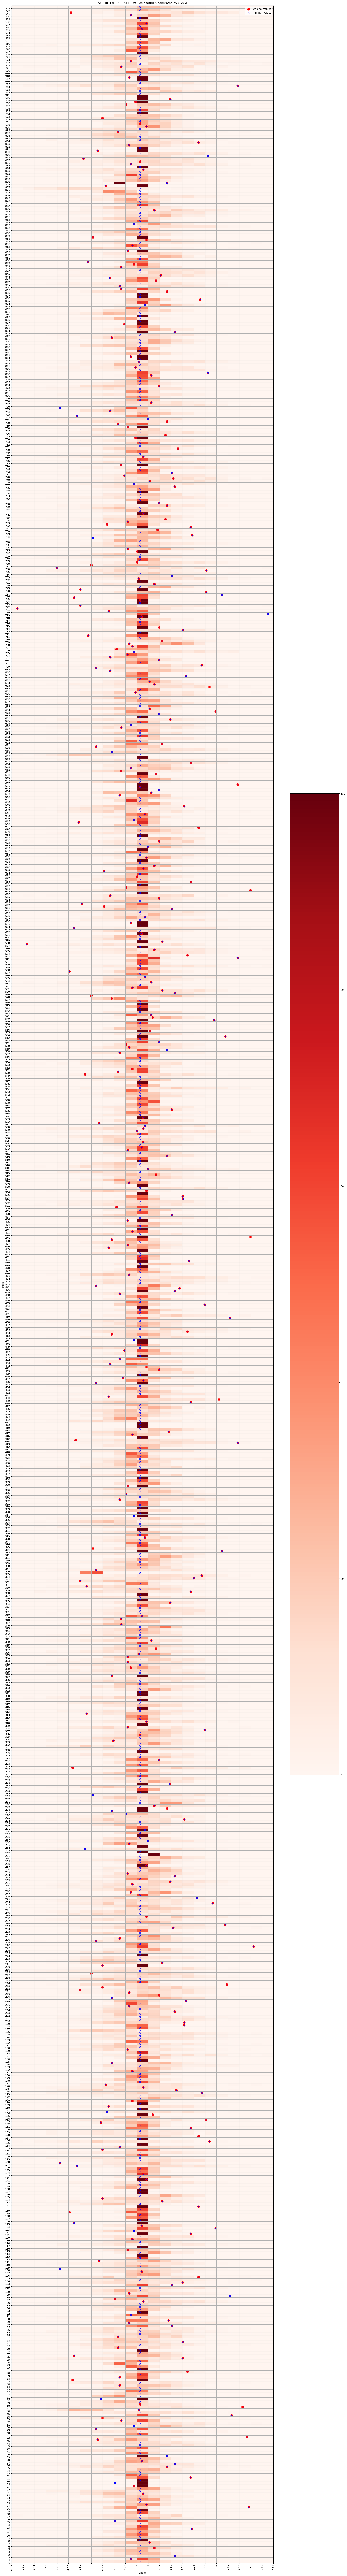

In [ ]:
# Define bin edges and adjust number of bins
n_bins = 23
h_min = heatmap_feature_min_value
h_max = heatmap_feature_max_value
width = (h_max - h_min) / (n_bins-1)
bin_edges = np.arange(h_min - width/2, h_max +  width, width)

# Determine the number of samples based on the length of an entry with a list of values
list_length = None
for entry in heatmap_feature_values:
    if isinstance(entry, list):
        list_length = len(entry)
        break

histograms = []

for entry in heatmap_feature_values:
    if isinstance(entry, list):
        # Apply np.histogram with specified bin edges
        hist, _ = np.histogram(entry, bins=bin_edges)
        histograms.append(hist)
    else:
        # Single-value entry: Place it in the correct bin and set frequency to list_length
        hist = np.zeros(len(bin_edges) - 1)
        index = np.digitize([entry], bin_edges)[0] - 1
        if 0 <= index < len(hist):
            hist[index] = list_length
        histograms.append(hist)

# Reshape histograms to fit imshow format (histograms should be a 2D array)
histograms_2d = np.array(histograms)

# Determine figure height based on the number of datapoints
fig_height = max(6, n_datapoints * 0.2)
fig_width = min(max(10, bin_edges.shape[0] * 1), 32)

extent = [bin_edges[0], bin_edges[-1], 0, len(histograms)]

# Create heatmap
plt.figure(figsize=(fig_width, fig_height))
plt.imshow(histograms_2d, aspect='auto', cmap='Reds', extent=extent)
plt.colorbar()
plt.xticks(bin_edges, labels=np.round(bin_edges, 2), rotation=90)
plt.yticks(range(n_datapoints), range(n_datapoints))
plt.xlabel('Values')
plt.ylabel('Index')
plt.title(heatmap_feature + ' values heatmap generated by cGMM')

# Add markers for original values of a missing feature
original_values = heatmap_feature_original_values[heatmap_feature_original_values != -1] # Selecting only the non -1 values
indexes = heatmap_feature_original_values.index[heatmap_feature_original_values != -1] + 0.5 # Indexes corresponding to non -1 values
plt.scatter(original_values, indexes, color='red', marker='o', s=80, label='Original Values')
plt.scatter(imputer_df[heatmap_feature], imputer_df.index + 0.5, color='blue', marker='x', label='Imputer Values')

plt.grid(True)
plt.legend()
plt.savefig('images/heatmaps/' + heatmap_feature + '_heatmap.png')
plt.show()